In [62]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, date2num, num2date
from matplotlib import ticker
%matplotlib inline

In [63]:
marathon = pd.read_csv("/content/world_marathon_majors.csv", encoding='cp1252', parse_dates=['time'])

In [64]:
marathon.marathon.unique()

array(['Tokyo', 'Berlin', 'Boston', 'NYC', 'London', 'Chicago'],
      dtype=object)

### O objetivo desta análise é entender a evolução dos primeiros colocados das mais famosas maratonas no período entre 1897 e 2018.

#### Visto que a prova é separada por genero, iremos segmentar os nossos dados desta maneira.

<Axes: ylabel='year'>

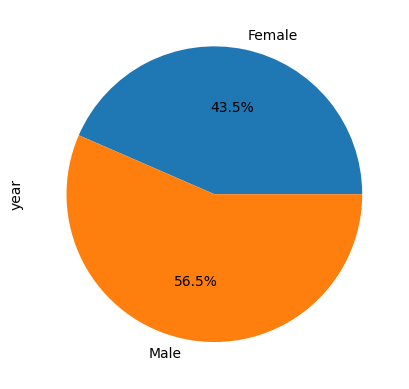

In [65]:
marathon.groupby(["gender"]).count()["year"].plot.pie(autopct="%.1f%%")

#### A maior parte dos competidores são homens, mas é importante entendermos que houve a participação de mulheres somente após 1960.

In [66]:
marathon.groupby(["gender"]).min()

,year,winner,country,time,marathon
gender,,,,,
Female,1966,Aberu Kebede,Australia,2018-05-04 02:15:25,Berlin
Male,1897,Abdelkader El Mouaziz,Australia,2018-05-04 02:02:57,Berlin


### Medindo o pace
#### Para obter a performance dos carredores utilizamos uma métrica conhecida como pace (min/km).

In [67]:
marathon["pace"] = (marathon["time"]).apply(lambda x: pd.Timedelta((x.hour * 60 + x.minute + x.second / 60) / 42.0, unit="minutes"))

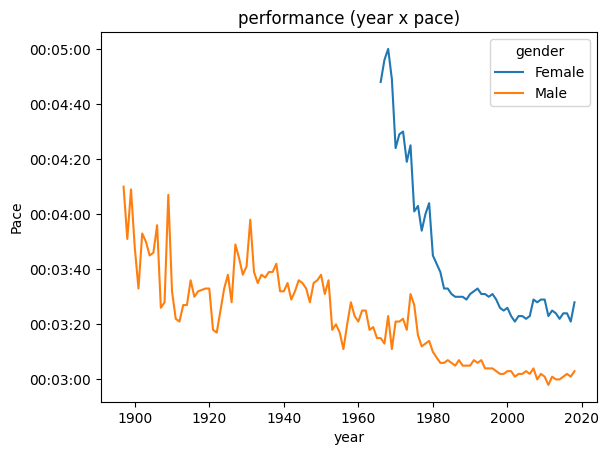

In [68]:
pace_data = marathon.groupby(["year", "gender"])["pace"].mean().astype("timedelta64[s]")

ax = pace_data.unstack().plot(ylabel='Pace', title="performance (year x pace)")

def paceTimeTicks(paceInSeconds, pos):
    d = pd.Timedelta(seconds=paceInSeconds)
    return str(d).split(' ')[-1]

formatter = ticker.FuncFormatter(paceTimeTicks)                                                                                                                                                                                                                         
ax.yaxis.set_major_formatter(formatter)

#### É possível observar que na década de 1980 houve uma grande queda nos tempos das maratonas. Em seguida, a diminuição dos tempos de realização das provas continuaram, mas com uma certa estabilização.
#### Além disso, as mulheres começaram a participar das maratonas apenas depois de 1960, e os homens competiam desde 1897.


Text(185.5, 30.800000000000004, 'median = 185.0')

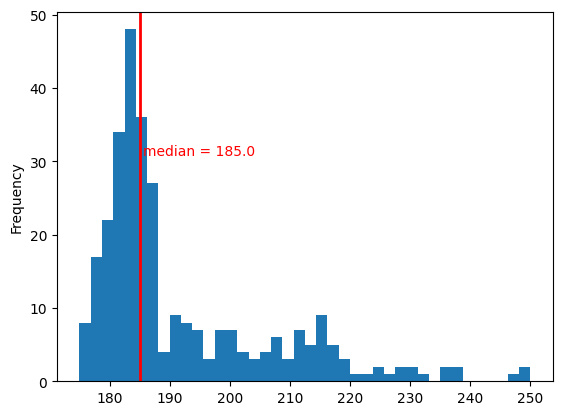

In [73]:
marathon_male = marathon[marathon["gender"] == "Male"]
pace_data = marathon_male["pace"].astype('timedelta64[s]')

pace_data.plot.hist(bins=40)


plt.axvline(pace_data.median(), color='red', linewidth=2)
plt.annotate('median = '+str(round(pace_data.median(),2)), 
             color = 'red',
             xy=(pace_data.median()+0.5, 1.1*pace_data.value_counts().max()))

Text(208.5, 24.200000000000003, 'median = 208.0')

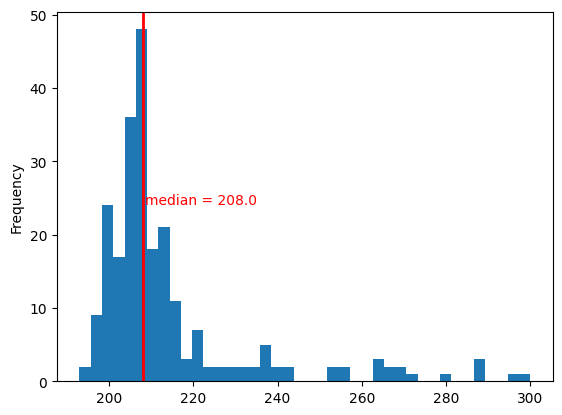

In [74]:
marathon_female = marathon[marathon["gender"] == "Female"]
pace_data = marathon_female["pace"].astype('timedelta64[s]')

pace_data.plot.hist(bins=40)

plt.axvline(pace_data.median(), color='red', linewidth=2)
plt.annotate('median = '+str(round(pace_data.median(),2)), 
             color = 'red',
             xy=(pace_data.median()+0.5, 1.1*pace_data.value_counts().max()))

#### A mediana das corridas por genero indica o tempo de conclusão de uma maratona. Para os homens 185 min e para mulheres 208 min.

#### Evolução dos corredores por prova de maratona ao longo dos anos.


<Axes: xlabel='year'>

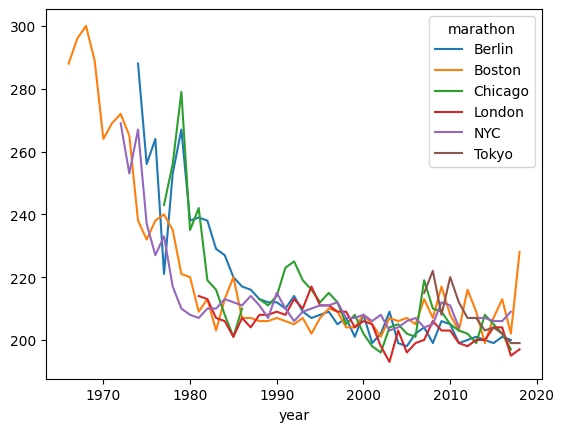

In [75]:
pace_marathon_data = marathon_female.groupby(["year", "marathon"])["pace"].mean().astype("timedelta64[s]")
pace_marathon_data.unstack().plot.line()

<Axes: xlabel='year'>

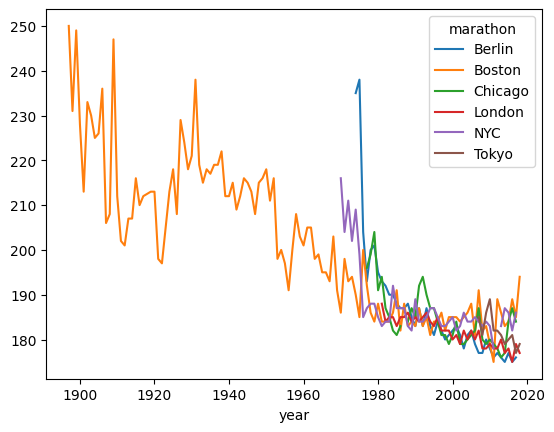

In [76]:
pace_marathon_data = marathon_male.groupby(["year", "marathon"])["pace"].mean().astype("timedelta64[s]")
pace_marathon_data.unstack().plot.line()

#### Observando o gráfico para ambos os gêneros, a maratona com melhor (menor) pace é a maratona de Londres e Berlin